# 1. Lecture CSV

In [44]:
import en_core_web_sm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from spacy.lang.en.stop_words import STOP_WORDS

from PIL import Image

import wordcloud

In [45]:
# Permet d"afficher toute la largeur de chaque colonne
pd.set_option("display.max_colwidth", 200)

In [46]:
df_corpus = pd.read_csv("../datas/sample-data.csv", index_col="id")
df_corpus.head()

,description
id,
1,"Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space ..."
2,Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93...
3,"Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7%..."
4,"Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mo..."
5,"Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true ""best of all worlds"" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather t..."


---

# 2. Preprocessing

In [47]:
print(df_corpus["description"])

id
1      Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space ...
2      Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93...
3      Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7%...
4      Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mo...
5      Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for bl

Les descriptions d'articles semblent être en HTML (balises)

## 2.1 Nettoyage
- On enlève la ponctuation
- On passe en minuscules
- On enlève les balises HTML

In [48]:
# On enlève les caractères spéciaux (sauts de ligne, ...)
df_corpus["description_clean"] = df_corpus["description"].str.replace(r"\s+", " ", regex=True).str.strip()

# On enlève les balises HTML
df_corpus["description_clean"] = df_corpus["description_clean"].str.replace(r"<.*?>", " ", regex=True)

# On enlève la ponctuation et tout ce qui est numérique
df_corpus["description_clean"] = df_corpus["description_clean"].str.replace(r"[^A-Za-z ]+", " ", regex = True)

# On passe en minuscule
df_corpus["description_clean"] = df_corpus["description_clean"].fillna("").apply(lambda x: x.lower())

df_corpus.head()

,description,description_clean
id,,
1,"Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space ...",active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space ...
2,Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93...,active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport boxer briefs are made from breathable ...
3,"Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7%...",active sport briefs these superbreathable no fly briefs are the minimalist s choice for high octane endeavors made from a blend of fast wicking quick drying polyester recycled and spand...
4,"Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mo...",alpine guide pants skin in climb ice switch to rock traverse a knife edge ridge and boogie back down these durable weather resistant and breathable soft shell pants keep stride on every mo...
5,"Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true ""best of all worlds"" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather t...",alpine wind jkt on high ridges steep ice and anything alpine this jacket serves as a true best of all worlds staple it excels as a stand alone shell for blustery rock climbs cool weather t...


In [49]:
nlp = en_core_web_sm.load()

In [50]:
corpus_clean = " ".join(df_corpus["description_clean"].astype(str))
doc = nlp(corpus_clean)

Wordcloud après nettoyage du texte

In [51]:
the_north_face_mask = np.array(Image.open("../utils/mountain.jpg"))
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color="steelblue", mask = the_north_face_mask)

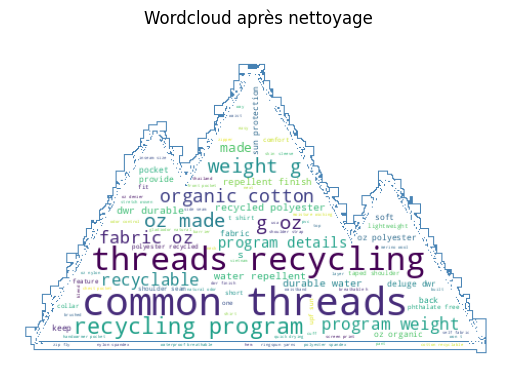

In [52]:
cloud = wd.generate(doc.text)
plt.imshow(cloud)
plt.title("Wordcloud après nettoyage")
plt.axis("off")
plt.show()

## 2.2 Common Words

Lemmatization + Tokenization du corpus

In [53]:
lemmatized_doc = [token.lemma_ for token in doc if token.text not in STOP_WORDS]

In [54]:
lemmatized_doc[0:10]

['active',
 'classic',
 'boxer',
 '  ',
 's',
 'reason',
 'boxer',
 'cult',
 'favorite',
 '  ']

On identifie les mots les plus présents du corpus

In [55]:
total_mots = len(lemmatized_doc)
print(f"Nombre total de mots dans le corpus : {total_mots}")

Nombre total de mots dans le corpus : 70642


In [56]:
df_cw = pd.DataFrame()

df_cw["Texte"] = lemmatized_doc
df_cw["Occurence"] = df_cw["Texte"].map( df_cw["Texte"].value_counts())
df_cw = df_cw.drop_duplicates(keep="first")

In [57]:
top_words = df_cw.sort_values("Occurence", ascending=False).head(20)

# Barplot interactif
fig = px.bar(top_words, x="Texte", y="Occurence",
    title="Top 20 des mots les plus fréquents",
    labels={"Texte": "Mot", "Occurence": "Nombre d\'occurrences"},
    color="Occurence", color_continuous_scale="viridis")

fig.update_layout(xaxis_tickangle=-45, title_x=0.5)
fig.show()

Je considère qu’un mot est "commun" s’il apparaît dans plus de 1% du corpus

In [58]:
# Ceux qui apparaissent plus de 1% du total
seuil_common = 0.01 * total_mots
mask = (df_cw["Occurence"] > seuil_common)

common_words = df_cw[mask]["Texte"].to_list()
common_words

['  ', ' ', 'oz', 'recycle', 'polyester', '    ', '   ', 'fabric', 'pocket']

J'ajoute les common words aux stop words

In [59]:
STOP_WORDS = STOP_WORDS.union(common_words)

## 2.3 Stop Words

Lemmatization + Tokenization + on enlève les Stop Words - Pour chaque article

In [60]:
tokenized_doc = df_corpus["description_clean"].apply(lambda doc: [token.lemma_ for token in nlp(doc) if token.text not in STOP_WORDS])
tokenized_doc

id
1      [active, classic, boxer, s, reason, boxer, cult, favorite, cool, especially, sticky, situation, quick, dry, lightweight, underwear, take, minimal, space, travel, pack, expose, brush, waistband, of...
2      [active, sport, boxer, brief, skin, glory, require, movement, boxer, decide, poach, route, form, fit, active, sport, boxer, brief, breathable, recycle, s, fast, wicke, dry, quickly, spandex, stret...
3      [active, sport, brief, superbreathable, fly, brief, minimalist, s, choice, high, octane, endeavor, blend, fast, wicke, quick, dry, recycle, spandex, stretch, mesh, support, open, mesh, cool, airfl...
4      [alpine, guide, pant, skin, climb, ice, switch, rock, traverse, knife, edge, ridge, boogie, durable, weather, resistant, breathable, soft, shell, pant, stride, mountain, endeavor, midweight, stret...
5      [alpine, wind, jkt, high, ridge, steep, ice, alpine, jacket, serve, true, good, world, staple, excel, stand, shell, blustery, rock, climb, cool, weather, trail, r

In [61]:
df_corpus["description_nlp_ready"] = [" ".join(x) for x in tokenized_doc]
df_corpus.head()

,description,description_clean,description_nlp_ready
id,,,
1,"Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space ...",active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space ...,active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel c...
2,Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93...,active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport boxer briefs are made from breathable ...,active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable recycle s fast wicke dry quickly spandex stretch seamless waistband soft ...
3,"Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7%...",active sport briefs these superbreathable no fly briefs are the minimalist s choice for high octane endeavors made from a blend of fast wicking quick drying polyester recycled and spand...,active sport brief superbreathable fly brief minimalist s choice high octane endeavor blend fast wicke quick dry recycle spandex stretch mesh support open mesh cool airflow soft edging leg opening...
4,"Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mo...",alpine guide pants skin in climb ice switch to rock traverse a knife edge ridge and boogie back down these durable weather resistant and breathable soft shell pants keep stride on every mo...,alpine guide pant skin climb ice switch rock traverse knife edge ridge boogie durable weather resistant breathable soft shell pant stride mountain endeavor midweight stretch weave won t restrict m...
5,"Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true ""best of all worlds"" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather t...",alpine wind jkt on high ridges steep ice and anything alpine this jacket serves as a true best of all worlds staple it excels as a stand alone shell for blustery rock climbs cool weather t...,alpine wind jkt high ridge steep ice alpine jacket serve true good world staple excel stand shell blustery rock climb cool weather trail run high output ski tour condition ice alpine climb functio...


In [62]:
corpus_tokenized = " ".join(df_corpus["description_nlp_ready"].astype(str))
doc = nlp(corpus_tokenized)

Wordcloud après la suppression des common words et stop words

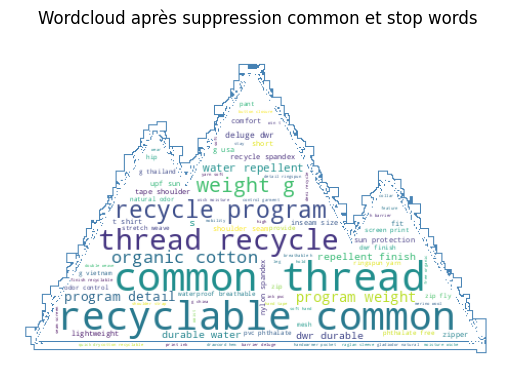

In [63]:
cloud = wd.generate(doc.text)
plt.imshow(cloud)
plt.title("Wordcloud après suppression common et stop words")
plt.axis("off")
plt.show()

---

Sauvegarde du fichier préprocessé

In [64]:
df_corpus.to_csv("../datas/sample-data-clean.csv")